# Multi Layer Perceptron Projet


## Importing the libraries


In [297]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from keras import layers
from tensorflow import keras
import pathlib
from keras import backend as K
import os
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix

MODELS_DIR = pathlib.Path("./models")


## Functions

In [338]:
def plot_history(history):
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 1, 1)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.legend()
    plt.grid()

    plt.subplot(3, 1, 2)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(3, 1, 3)
    plt.plot(history.history['auc'], label='Training AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.title('AUC')
    plt.legend()
    plt.grid()

    plt.show()


def evaluate_model(model, X_test, y_test):
    """
    Prints the accuracy, precision, recall and f1 score.
    Plot the confusion matrix.
    """
    y_pred = np.heaviside(model.predict(X_test)-0.5, 1)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    fig = plt.figure(figsize=(8, 8))
    plt.title("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues",
                fmt="d", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


def reset_weights(model):
    session = K.get_session()
    for layer in model.layers:
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)


## Importing the dataset


In [299]:
data = pd.read_csv('./data/breast_cancer.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Preprocessing the dataset


### Cleaning the data


In [300]:
data.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [301]:
data.isna().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [302]:
data.shape


(569, 33)

In [303]:
data.dropna(axis=1, inplace=True)


In [304]:
data.shape


(569, 32)

### Encoding categorical data


In [305]:
data.replace({'diagnosis': {'M': 1, 'B': 0}}, inplace=True)


### Splitting the dataset into the Training set and Test set


In [306]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)


In [307]:
train_data.shape, test_data.shape


((455, 32), (114, 32))

### Plotting the histogram of the training data


In [308]:
train_data.drop('id', axis=1, inplace=True)
test_data.drop('id', axis=1, inplace=True)


**TODO**


array([[<Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'cent

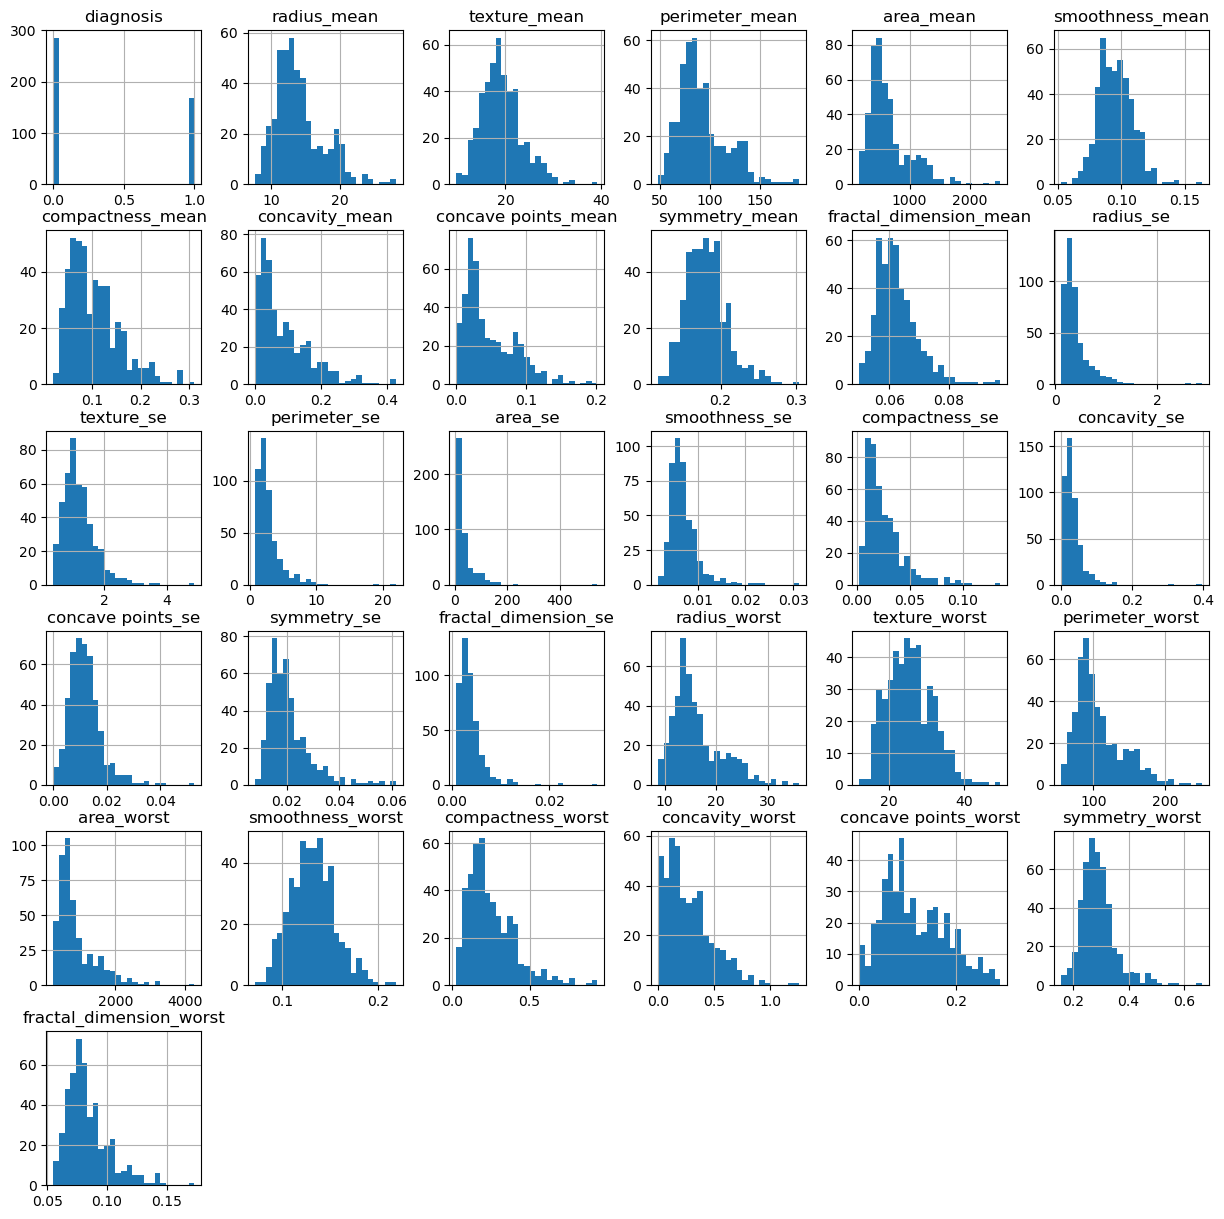

In [309]:
train_data.hist(bins=25, figsize=(15, 15))


**TODO**


### Calculating the correlation matrix


<Figure size 800x800 with 0 Axes>

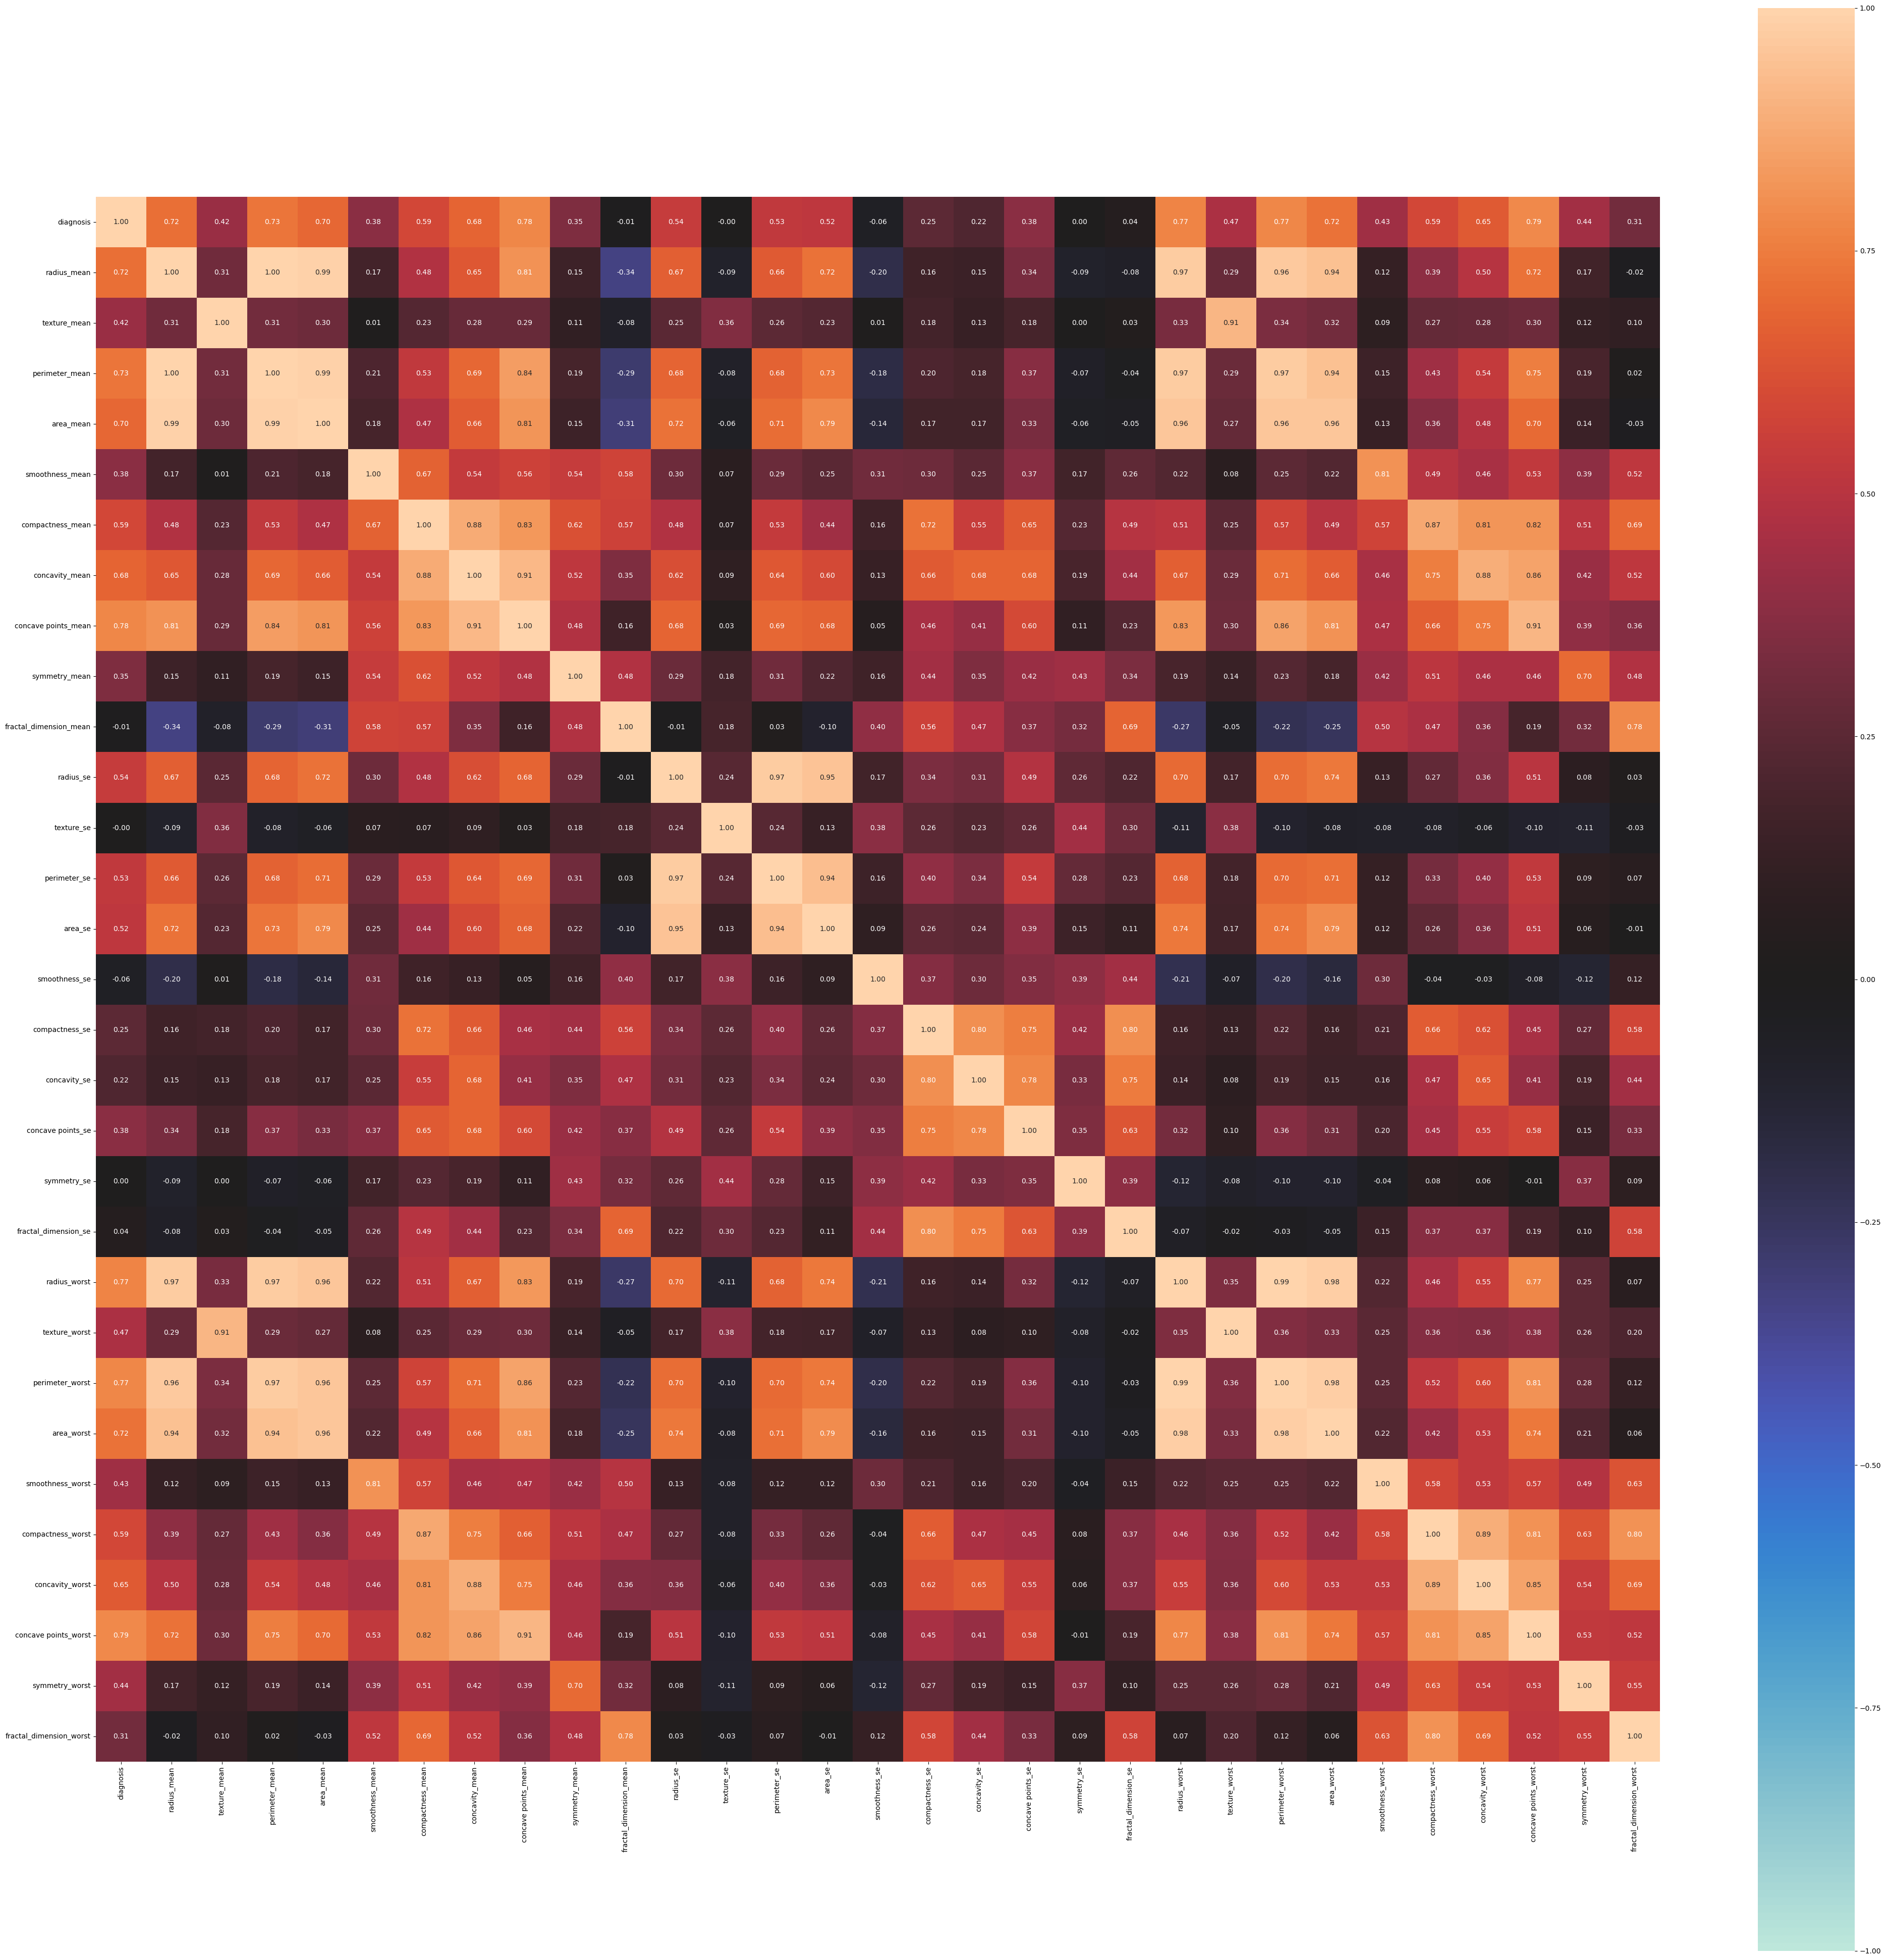

In [310]:
plt.figure(figsize=(8, 8))
corr_mat_complete = associations(
    train_data,
    filename='./images/complete_correlation.png',
    figsize=(50, 50))


In [311]:
corr_mat = train_data.corr()
corr_mat_abs = corr_mat.abs()


In [312]:
# Sort the correlation matrix in descending order
sorted_corr_mat = corr_mat_abs.sort_values(by=['diagnosis'], ascending=False)
abs(sorted_corr_mat['diagnosis'])


diagnosis                  1.000000
concave points_worst       0.788885
concave points_mean        0.778115
perimeter_worst            0.774998
radius_worst               0.766527
perimeter_mean             0.731859
area_worst                 0.722875
radius_mean                0.718073
area_mean                  0.695171
concavity_mean             0.683262
concavity_worst            0.649952
compactness_mean           0.590554
compactness_worst          0.588884
radius_se                  0.540126
perimeter_se               0.529211
area_se                    0.517064
texture_worst              0.467479
symmetry_worst             0.440323
smoothness_worst           0.430364
texture_mean               0.416213
concave points_se          0.380240
smoothness_mean            0.375137
symmetry_mean              0.348123
fractal_dimension_worst    0.312994
compactness_se             0.254370
concavity_se               0.216047
smoothness_se              0.058123
fractal_dimension_se       0

**TODO**


In [313]:
mask = corr_mat_abs['diagnosis'] <= 0.1
less_corr_feat = corr_mat_abs[mask]['diagnosis'].index
less_corr_feat


Index(['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

### Seperating the features and the labels


In [314]:
X_train = train_data.drop(['diagnosis'], axis=1)
X_test = test_data.drop(['diagnosis'], axis=1)

y_train = train_data['diagnosis']
y_test = test_data['diagnosis']


### Feature extraction using random forest


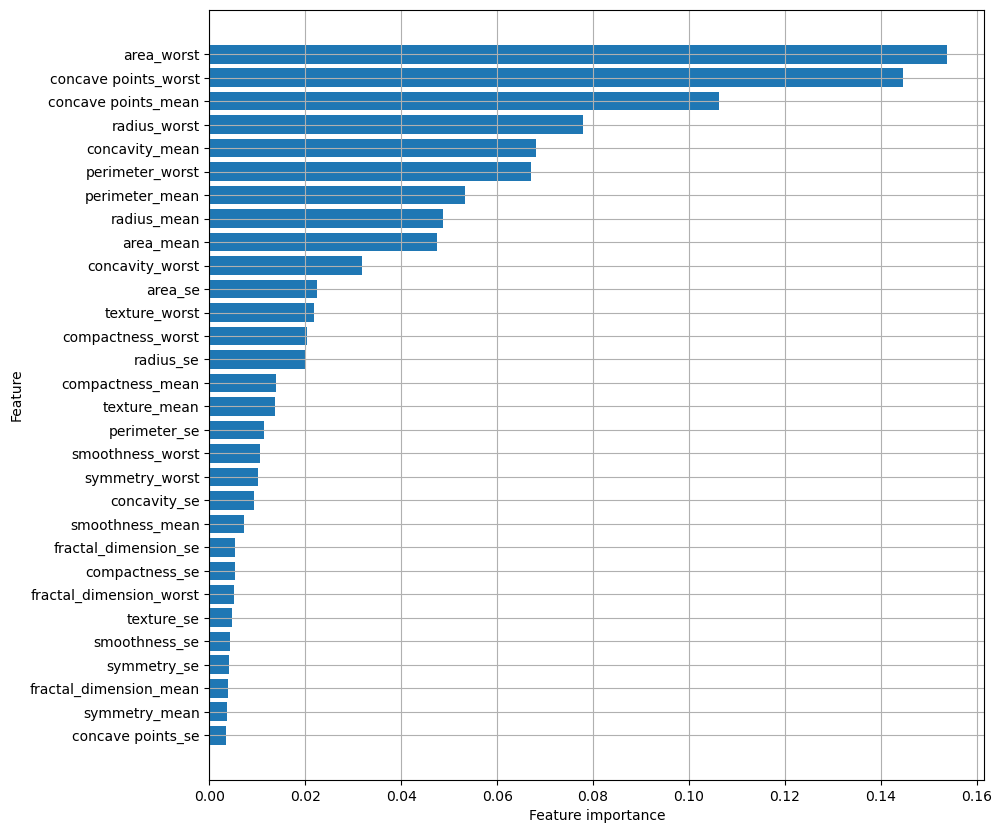

In [315]:
rnd_frst_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rnd_frst_clf.fit(X_train, y_train)

feat_ind = list(zip(X_train.columns,
                    rnd_frst_clf.feature_importances_))
feat_ind.sort(key=lambda x: x[1])
fig = plt.figure(figsize=(10, 10))
plt.barh([x[0] for x in feat_ind], [x[1] for x in feat_ind])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.grid()
plt.show()


**TODO**


In [316]:
X_train.drop(less_corr_feat, axis=1, inplace=True)
X_test.drop(less_corr_feat, axis=1, inplace=True)


### Potting the scatter plot of the features


In [317]:
X_train.dtypes


radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
radius_se                  float64
perimeter_se               float64
area_se                    float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
dtype: object

### Normalizing the data


First, we use standard scaler to detect the outliers.


In [318]:
X_train_mean = X_train.mean()
X_train_std = X_train.std()

X_train_scaled = (X_train - X_train_mean) / X_train_std
X_test_scaled = (X_test - X_train_mean) / X_train_std


### Plotting the box plot of the features


<Axes: >

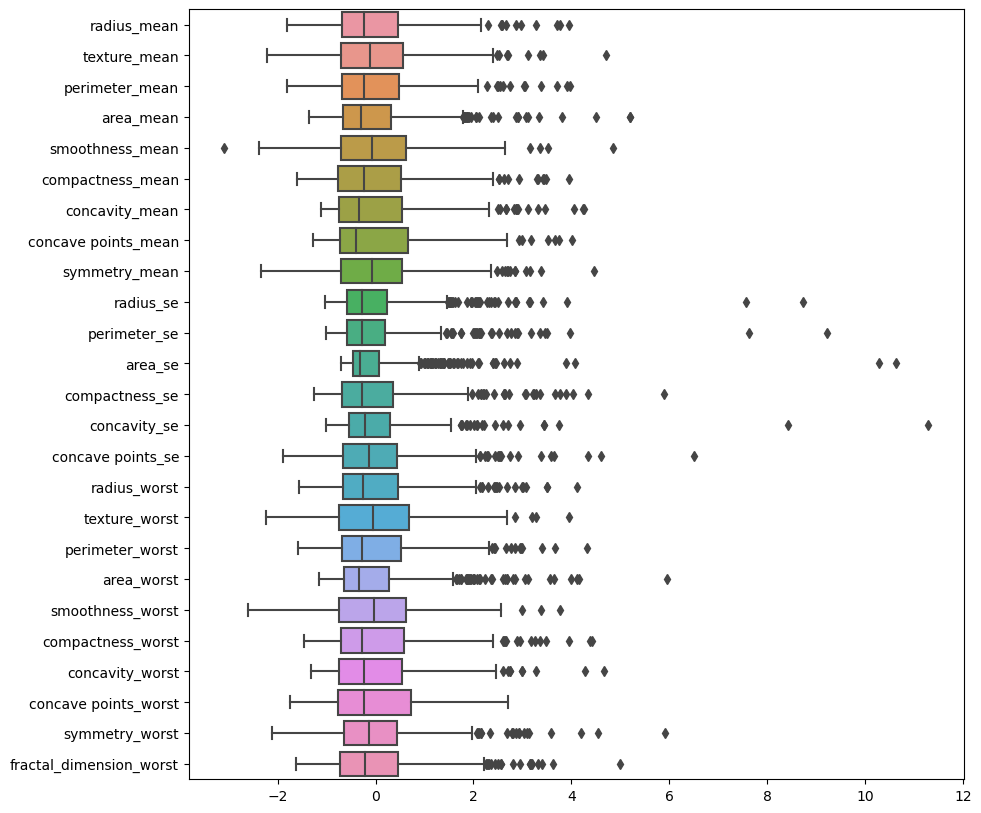

In [319]:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(data=X_train_scaled, orient='h')


In [320]:
X_train_scaled.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,455.000000,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-3.045183e-16,-3.513673e-17,-1.288347e-16,3.904081e-16,-2.498612e-16,-5.660917e-17,-5.075305e-17,2.127724e-16,1.366428e-16,8.588978e-17,...,-7.808162e-17,-6.715019e-16,0.000000,1.815398e-16,1.171224e-17,-2.283887e-16,-6.344132e-17,-8.784182e-17,4.997224e-16,9.760202e-19
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.817582e+00,-2.221056e+00,-1.807507e+00,-1.363535e+00,-3.096603e+00,-1.605461e+00,-1.118668e+00,-1.268513e+00,-2.342852e+00,-1.025974e+00,...,-1.570710e+00,-2.228434e+00,-1.576439,-1.150992e+00,-2.615060e+00,-1.454394e+00,-1.311352e+00,-1.747881e+00,-2.121925e+00,-1.615195e+00
25%,-6.823420e-01,-7.067580e-01,-6.900018e-01,-6.594790e-01,-7.124195e-01,-7.762328e-01,-7.497135e-01,-7.340968e-01,-7.002753e-01,-5.905329e-01,...,-6.609700e-01,-7.404142e-01,-0.684595,-6.351141e-01,-7.422129e-01,-6.953669e-01,-7.547565e-01,-7.692520e-01,-6.492700e-01,-7.181711e-01
50%,-2.312437e-01,-1.183855e-01,-2.426706e-01,-2.892789e-01,-8.073127e-02,-2.410749e-01,-3.442667e-01,-3.906934e-01,-6.907484e-02,-2.765771e-01,...,-2.629460e-01,-5.205056e-02,-0.282643,-3.353816e-01,-2.738576e-02,-2.750830e-01,-2.301576e-01,-2.383768e-01,-1.235478e-01,-2.133498e-01
75%,4.588376e-01,5.625796e-01,4.879428e-01,3.189874e-01,6.324768e-01,5.275475e-01,5.467851e-01,6.730161e-01,5.348403e-01,2.321443e-01,...,4.520424e-01,6.849519e-01,0.525754,2.721866e-01,6.289555e-01,5.732259e-01,5.377577e-01,7.182089e-01,4.314691e-01,4.595585e-01
max,3.957324e+00,4.710489e+00,3.972439e+00,5.202586e+00,4.859294e+00,3.959953e+00,4.252055e+00,4.017849e+00,4.471203e+00,8.726432e+00,...,4.116358e+00,3.957771e+00,4.317553,5.948872e+00,3.763364e+00,4.419968e+00,4.667690e+00,2.706695e+00,5.911172e+00,4.993986e+00


According to the box plots and the maximum, mean and 75% we should delete outliers.


### Deleting the outliers


In [321]:
outliers = abs(X_train_scaled) > 3
outliers = outliers.sum(axis=1)
outliers = outliers[outliers > 0]

X_train_scaled.drop(outliers.index, inplace=True)
y_train.drop(outliers.index, inplace=True)

X_train_scaled = X_train_scaled.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


### Plotting the box plot of the features after deleting the outliers


<Axes: >

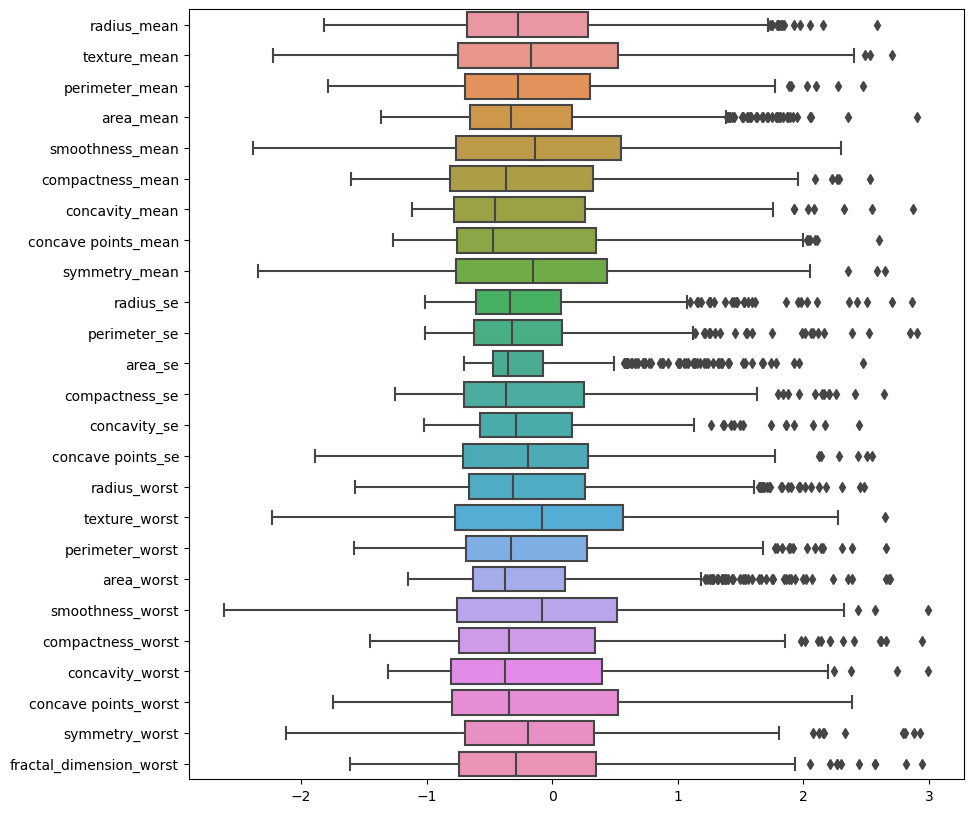

In [322]:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(data=X_train_scaled, orient='h')


In [323]:
X_train_scaled.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,...,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,-0.090285,-0.075280,-0.099546,-0.106103,-0.094438,-0.175064,-0.184969,-0.155022,-0.142169,-0.149122,...,-0.102832,-0.066045,-0.111540,-0.117102,-0.067695,-0.140131,-0.151156,-0.137839,-0.116500,-0.123946
std,0.863878,0.931593,0.856427,0.807428,0.907392,0.812573,0.781383,0.835254,0.853735,0.693021,...,0.859266,0.947015,0.849229,0.793912,0.947343,0.838835,0.843854,0.895571,0.815196,0.838591
min,-1.817582,-2.221056,-1.790239,-1.363535,-2.386986,-1.605461,-1.118668,-1.268513,-2.342852,-1.015733,...,-1.570710,-2.228434,-1.576439,-1.150992,-2.615060,-1.454394,-1.311352,-1.747881,-2.121925,-1.615195
25%,-0.681635,-0.753640,-0.693188,-0.659479,-0.763773,-0.814683,-0.780512,-0.762998,-0.763941,-0.604836,...,-0.664088,-0.777512,-0.690887,-0.635422,-0.759542,-0.740363,-0.804423,-0.802508,-0.697567,-0.743664
50%,-0.269424,-0.167612,-0.276179,-0.330412,-0.137113,-0.365621,-0.455003,-0.468859,-0.156388,-0.335554,...,-0.316986,-0.082553,-0.330134,-0.377836,-0.081539,-0.347012,-0.379395,-0.348746,-0.197181,-0.292351
75%,0.284196,0.521558,0.296141,0.159244,0.544493,0.323623,0.257045,0.345706,0.432975,0.071635,...,0.256668,0.562118,0.275565,0.101225,0.515233,0.341796,0.399385,0.519973,0.329333,0.351002
max,2.588474,2.703928,2.475853,2.906444,2.302375,2.530578,2.875399,2.604299,2.652181,2.867572,...,2.484771,2.650292,2.660607,2.688191,2.992217,2.943330,2.995755,2.386761,2.926274,2.943324


In [324]:
X_train_scaled.shape, y_train.shape


((404, 25), (404,))

### Normalizing the data with min-max scaler


We use min-max scaler to use the relu activation function.


In [325]:
X_train_scaled_min = X_train_scaled.min()
X_train_scaled_max = X_train_scaled.max()

X_train_scaled = (X_train_scaled - X_train_scaled_min) / \
    (X_train_scaled_max - X_train_scaled_min)
X_test_scaled = (X_test_scaled - X_train_scaled_min) / \
    (X_train_scaled_max - X_train_scaled_min)

X_train_scaled = X_train_scaled.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_train_scaled = X_train_scaled.to_numpy()
y_train = y_train.to_numpy()
X_test_scaled = X_test_scaled.to_numpy()
y_test = y_test.to_numpy()


In [326]:
X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape


((404, 25), (404,), (114, 25), (114,))

## Training the model


In [327]:
inputs = keras.Input(shape=(X_train_scaled.shape[1],))
x = layers.Dense(32, activation=None)(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dense(64, activation=None)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dropout(0.1)(x)

x = layers.Dense(128, activation=None)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dense(256, activation=None)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)
outputs = x
model = keras.Model(inputs=inputs, outputs=outputs, name='breast_cancer_model')

model.summary()


Model: "breast_cancer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense_30 (Dense)            (None, 32)                832       
                                                                 
 batch_normalization_24 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 activation_24 (Activation)  (None, 32)                0         
                                                                 
 dense_31 (Dense)            (None, 64)                2112      
                                                                 
 batch_normalization_25 (Bat  (None, 64)               256       
 chNormalization)                              

#### Training the model with learning_rate=0.01, epochs=50

In [328]:
model.reset_metrics
model.reset_states

model.compile(optimizer=keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy',
              metrics=['accuracy', 'AUC'])
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=os.path.join(
        MODELS_DIR, 'best_model_epoch50_lr01.keras'),
        save_best_only=True,
        monitor='val_loss')
]

history = model.fit(X_train_scaled, y_train, epochs=50,
                    batch_size=16, validation_split=0.2,
                    shuffle=True, callbacks=callbacks)


Epoch 1/50


/home/erfan/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


21/21 [==============================] - 3s 48ms/step - loss: 0.3004 - accuracy: 0.8916 - auc: 0.9461 - val_loss: 2.5955 - val_accuracy: 0.3086 - val_auc: 0.9321
Epoch 2/50
21/21 [==============================] - 0s 24ms/step - loss: 0.1996 - accuracy: 0.9381 - auc: 0.9637 - val_loss: 4.3049 - val_accuracy: 0.3210 - val_auc: 0.7232
Epoch 3/50
21/21 [==============================] - 1s 28ms/step - loss: 0.2312 - accuracy: 0.9226 - auc: 0.9703 - val_loss: 1.8911 - val_accuracy: 0.4074 - val_auc: 0.9307
Epoch 4/50
21/21 [==============================] - 1s 30ms/step - loss: 0.2327 - accuracy: 0.9164 - auc: 0.9610 - val_loss: 0.9689 - val_accuracy: 0.5679 - val_auc: 0.9921
Epoch 5/50
21/21 [==============================] - 1s 24ms/step - loss: 0.1293 - accuracy: 0.9598 - auc: 0.9888 - val_loss: 0.6349 - val_accuracy: 0.6914 - val_auc: 0.9896
Epoch 6/50
21/21 [==============================] - 1s 28ms/step - loss: 0.1507 - accuracy: 0.9567 - auc: 0.9798 - val_loss: 0.4834 - val_accuracy

4/4 [==============================] - 0s 12ms/step - loss: 0.1222 - accuracy: 0.9561 - auc: 0.9939


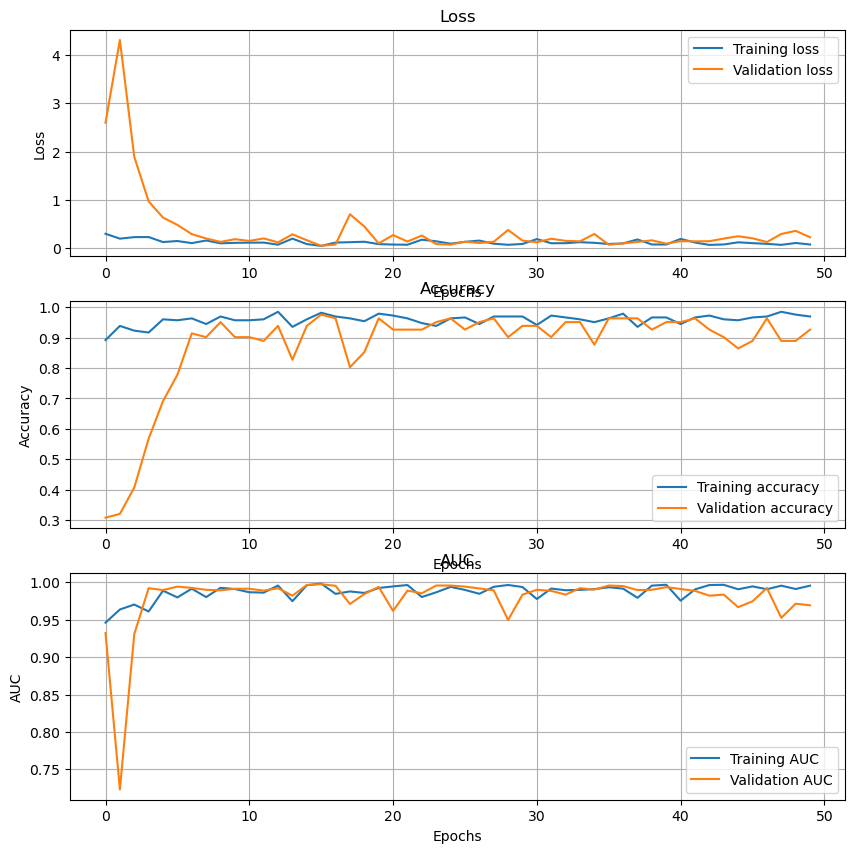

In [329]:
model = keras.models.load_model(os.path.join(
    MODELS_DIR, 'best_model_epoch50_lr01.keras'))

model.evaluate(X_test_scaled, y_test)

plot_history(history)


#### Training the model with learning_rate=0.01, epochs=100

In [330]:
model.reset_metrics
model.reset_states

model.compile(optimizer=keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy',
              metrics=['accuracy', 'AUC'])
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=os.path.join(
        MODELS_DIR, 'best_model_epoch100_lr01.keras'),
        save_best_only=True,
        monitor='val_loss')
]

history = model.fit(X_train_scaled, y_train, epochs=100,
                    batch_size=16, validation_split=0.2,
                    shuffle=True, callbacks=callbacks)


Epoch 1/100
21/21 [==============================] - 2s 39ms/step - loss: 0.3187 - accuracy: 0.9381 - auc: 0.9576 - val_loss: 0.2846 - val_accuracy: 0.8765 - val_auc: 0.9754
Epoch 2/100
21/21 [==============================] - 0s 20ms/step - loss: 0.0977 - accuracy: 0.9659 - auc: 0.9935 - val_loss: 1.1805 - val_accuracy: 0.6667 - val_auc: 0.9443
Epoch 3/100
21/21 [==============================] - 0s 19ms/step - loss: 0.0984 - accuracy: 0.9783 - auc: 0.9927 - val_loss: 0.6685 - val_accuracy: 0.7778 - val_auc: 0.9668
Epoch 4/100
21/21 [==============================] - 0s 21ms/step - loss: 0.1078 - accuracy: 0.9659 - auc: 0.9922 - val_loss: 0.2098 - val_accuracy: 0.8642 - val_auc: 0.9821
Epoch 5/100
21/21 [==============================] - 0s 21ms/step - loss: 0.0769 - accuracy: 0.9752 - auc: 0.9962 - val_loss: 0.1877 - val_accuracy: 0.9383 - val_auc: 0.9811
Epoch 6/100
21/21 [==============================] - 0s 20ms/step - loss: 0.1087 - accuracy: 0.9659 - auc: 0.9897 - val_loss: 0.10

4/4 [==============================] - 0s 8ms/step - loss: 0.1455 - accuracy: 0.9474 - auc: 0.9912


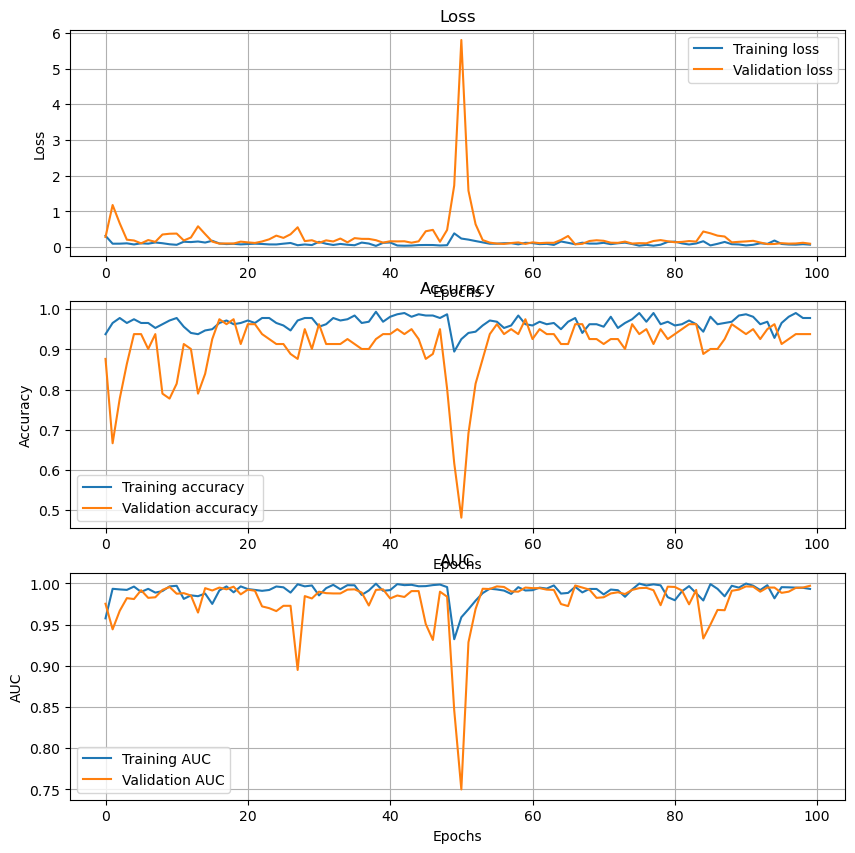

In [331]:
model = keras.models.load_model(os.path.join(
    MODELS_DIR, 'best_model_epoch100_lr01.keras'))

model.evaluate(X_test_scaled, y_test)

plot_history(history)


#### Training the model with learning_rate=0.001, epochs=50

In [332]:
model.reset_metrics
model.reset_states

model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='binary_crossentropy',
              metrics=['accuracy', 'AUC'])
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=os.path.join(
        MODELS_DIR, 'best_model_epoch50_lr001.keras'),
        save_best_only=True,
        monitor='val_loss')
]

history = model.fit(X_train_scaled, y_train, epochs=50,
                    batch_size=16, validation_split=0.2,
                    shuffle=True, callbacks=callbacks)


Epoch 1/50
21/21 [==============================] - 2s 41ms/step - loss: 0.0685 - accuracy: 0.9783 - auc: 0.9968 - val_loss: 0.0979 - val_accuracy: 0.9753 - val_auc: 0.9964
Epoch 2/50
21/21 [==============================] - 0s 23ms/step - loss: 0.0356 - accuracy: 0.9907 - auc: 0.9997 - val_loss: 0.1243 - val_accuracy: 0.9259 - val_auc: 0.9954
Epoch 3/50
21/21 [==============================] - 0s 21ms/step - loss: 0.0855 - accuracy: 0.9721 - auc: 0.9954 - val_loss: 0.1645 - val_accuracy: 0.9259 - val_auc: 0.9943
Epoch 4/50
21/21 [==============================] - 0s 20ms/step - loss: 0.0941 - accuracy: 0.9598 - auc: 0.9937 - val_loss: 0.1999 - val_accuracy: 0.9136 - val_auc: 0.9921
Epoch 5/50
21/21 [==============================] - 1s 25ms/step - loss: 0.1254 - accuracy: 0.9659 - auc: 0.9825 - val_loss: 0.1991 - val_accuracy: 0.9136 - val_auc: 0.9932
Epoch 6/50
21/21 [==============================] - 0s 18ms/step - loss: 0.0776 - accuracy: 0.9721 - auc: 0.9956 - val_loss: 0.2058 - v

4/4 [==============================] - 0s 15ms/step - loss: 0.1306 - accuracy: 0.9474 - auc: 0.9912


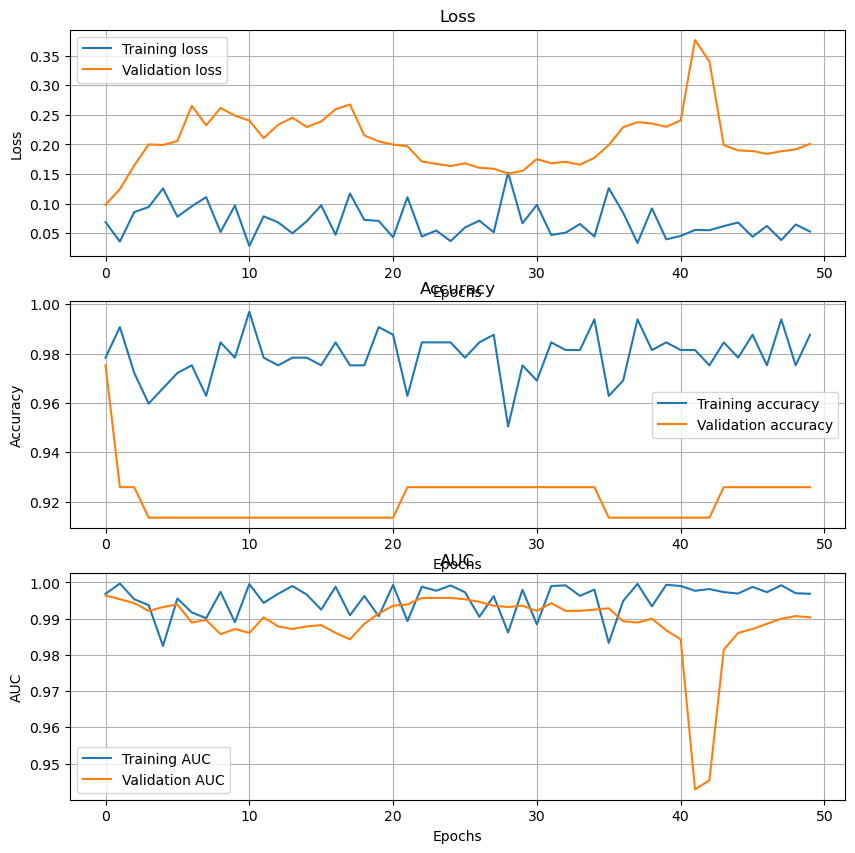

In [333]:
model = keras.models.load_model(os.path.join(
    MODELS_DIR, 'best_model_epoch50_lr001.keras'))

model.evaluate(X_test_scaled, y_test)

plot_history(history)


#### Training the model with learning_rate=0.001, epochs=100

In [334]:
model.reset_metrics
model.reset_states

model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='binary_crossentropy',
              metrics=['accuracy', 'AUC'])
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=os.path.join(
        MODELS_DIR, 'best_model_epoch100_lr001.keras'),
        save_best_only=True,
        monitor='val_loss')
]

history = model.fit(X_train_scaled, y_train, epochs=100,
                    batch_size=16, validation_split=0.2, shuffle=True, callbacks=callbacks)


Epoch 1/100
21/21 [==============================] - 3s 46ms/step - loss: 0.0656 - accuracy: 0.9814 - auc: 0.9969 - val_loss: 0.1417 - val_accuracy: 0.9259 - val_auc: 0.9957
Epoch 2/100
21/21 [==============================] - 1s 24ms/step - loss: 0.1084 - accuracy: 0.9690 - auc: 0.9923 - val_loss: 0.1536 - val_accuracy: 0.9259 - val_auc: 0.9957
Epoch 3/100
21/21 [==============================] - 1s 26ms/step - loss: 0.0853 - accuracy: 0.9752 - auc: 0.9928 - val_loss: 0.1854 - val_accuracy: 0.9259 - val_auc: 0.9961
Epoch 4/100
21/21 [==============================] - 0s 22ms/step - loss: 0.0977 - accuracy: 0.9783 - auc: 0.9893 - val_loss: 0.1715 - val_accuracy: 0.9259 - val_auc: 0.9943
Epoch 5/100
21/21 [==============================] - 0s 22ms/step - loss: 0.0591 - accuracy: 0.9814 - auc: 0.9975 - val_loss: 0.1596 - val_accuracy: 0.9259 - val_auc: 0.9921
Epoch 6/100
21/21 [==============================] - 0s 22ms/step - loss: 0.0579 - accuracy: 0.9876 - auc: 0.9966 - val_loss: 0.16

4/4 [==============================] - 0s 10ms/step - loss: 0.1200 - accuracy: 0.9474 - auc: 0.9918


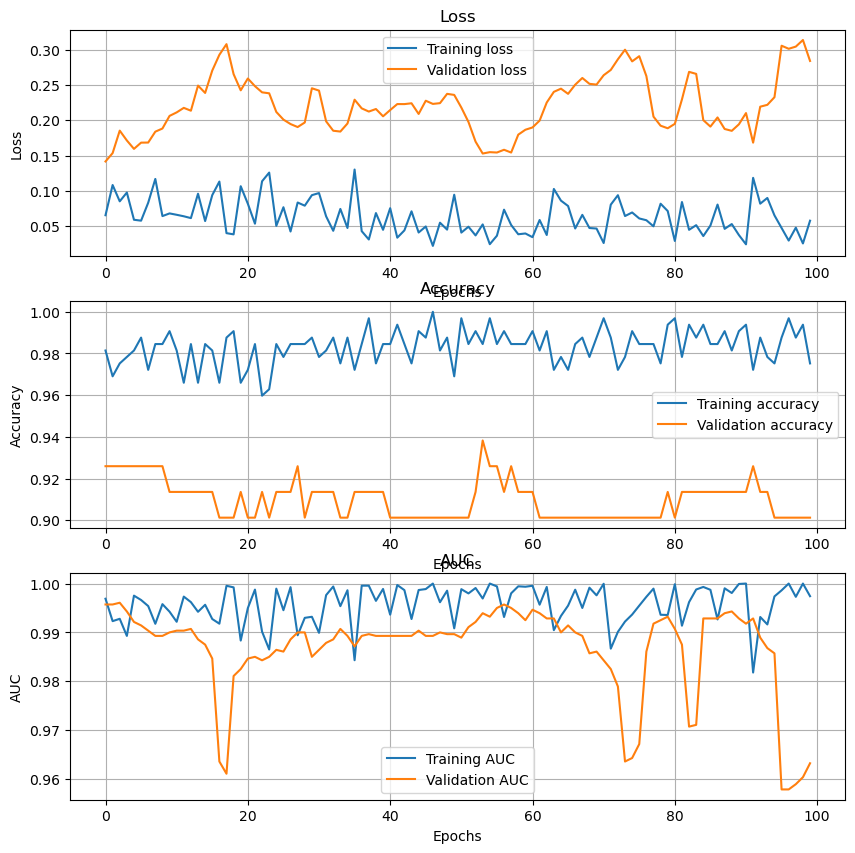

In [335]:
model = keras.models.load_model(os.path.join(
    MODELS_DIR, 'best_model_epoch100_lr001.keras'))

model.evaluate(X_test_scaled, y_test)

plot_history(history)


## Evaluating the model


4/4 [==============================] - 0s 4ms/step
Accuracy: 0.956140350877193
Precision: 0.9318181818181818
Recall: 0.9534883720930233
F1: 0.942528735632184
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:


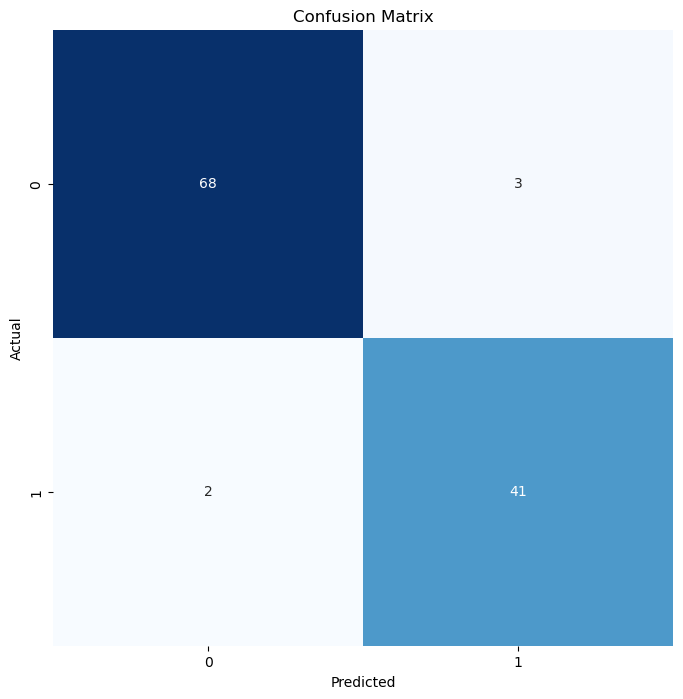

In [339]:
model = keras.models.load_model(os.path.join(
    MODELS_DIR, 'best_model_epoch50_lr01.keras'))

evaluate_model(model, X_test_scaled, y_test)